29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Data Summary:
Total samples: 70000
Image dimensions: (28, 28)
Flattened dimensions: 784
Number of classes: 10


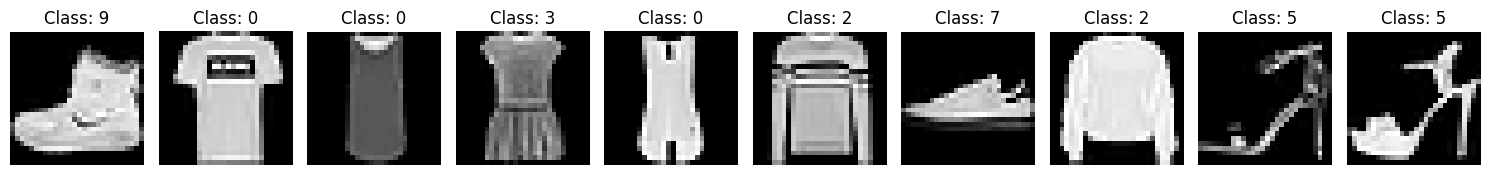

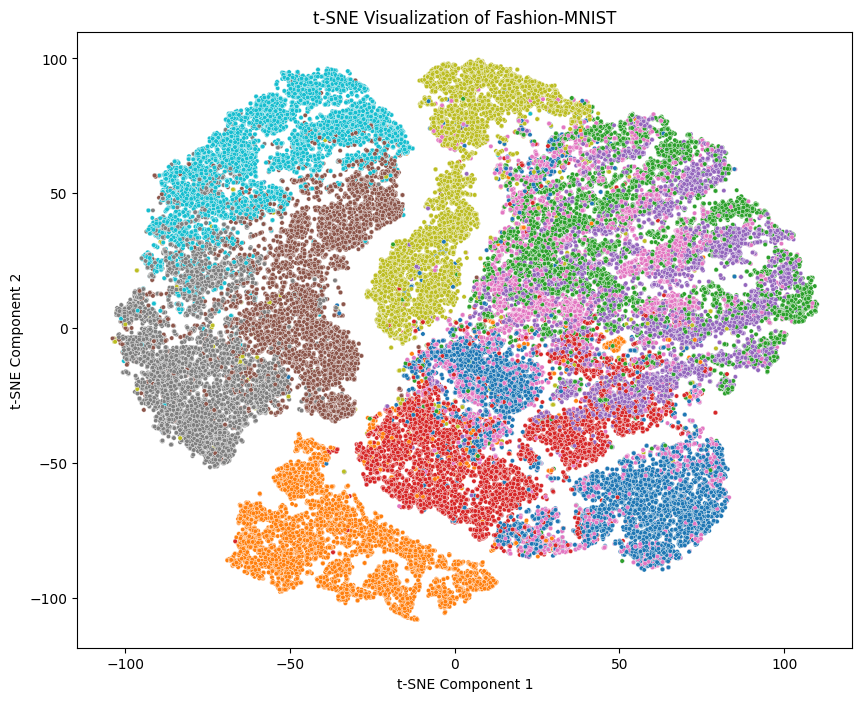

Clustering Evaluation:
Adjusted Rand Index (ARI): 0.3693
Normalized Mutual Information (NMI): 0.5198

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.80      0.79      1394
           1       0.96      0.96      0.96      1402
           2       0.76      0.75      0.76      1407
           3       0.85      0.87      0.86      1449
           4       0.74      0.78      0.76      1357
           5       0.94      0.94      0.94      1449
           6       0.65      0.59      0.62      1407
           7       0.91      0.94      0.93      1359
           8       0.94      0.95      0.94      1342
           9       0.96      0.94      0.95      1434

    accuracy                           0.85     14000
   macro avg       0.85      0.85      0.85     14000
weighted avg       0.85      0.85      0.85     14000



In [ ]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    adjusted_rand_score, normalized_mutual_info_score,
    classification_report, confusion_matrix
)
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from tensorflow.keras.datasets import fashion_mnist

# Load the dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x = np.concatenate([x_train, x_test], axis=0)
y = np.concatenate([y_train, y_test], axis=0)

# Flatten and normalize the data
x_flattened = x.reshape(x.shape[0], -1) / 255.0

# Data Summary
print("Data Summary:")
print(f"Total samples: {x_flattened.shape[0]}")
print(f"Image dimensions: {x[0].shape}")
print(f"Flattened dimensions: {x_flattened.shape[1]}")
print(f"Number of classes: {len(np.unique(y))}")

# Visualize some sample images
fig, axes = plt.subplots(1, 10, figsize=(15, 3))
for i, ax in enumerate(axes):
    ax.imshow(x[i], cmap='gray')
    ax.axis('off')
    ax.set_title(f"Class: {y[i]}")
plt.tight_layout()
plt.show()

# Dimensionality Reduction using PCA
pca = PCA(n_components=50)
x_pca = pca.fit_transform(x_flattened)

# Further reduction for visualization using t-SNE
tsne = TSNE(n_components=2, random_state=42)
x_tsne = tsne.fit_transform(x_pca)

# Plot the t-SNE result
plt.figure(figsize=(10, 8))
sns.scatterplot(x=x_tsne[:, 0], y=x_tsne[:, 1], hue=y, palette='tab10', legend=None, s=10)
plt.title("t-SNE Visualization of Fashion-MNIST")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.show()

# Perform clustering using K-Means
kmeans = KMeans(n_clusters=10, random_state=42)
clusters = kmeans.fit_predict(x_pca)

# Evaluate clustering results
ari = adjusted_rand_score(y, clusters)
nmi = normalized_mutual_info_score(y, clusters)
print(f"Clustering Evaluation:\nAdjusted Rand Index (ARI): {ari:.4f}\nNormalized Mutual Information (NMI): {nmi:.4f}")

# Train-Test Split
x_train_split, x_test_split, y_train_split, y_test_split = train_test_split(
    x_flattened, y, test_size=0.2, random_state=42
)

# Classification using Logistic Regression
clf = LogisticRegression(max_iter=1000, random_state=42)
clf.fit(x_train_split, y_train_split)
y_pred = clf.predict(x_test_split)

# Evaluate classification results
print("\nClassification Report:")
print(classification_report(y_test_split, y_pred))



